# Red FeedForward para problema XOR

El problema XOR no puede ser solucionado por un perceptrón simple. Para esto, se introducen capas ocultas que ayudan a transformar los datos de entrada y que se puede determinar regiones de decisión adecuadas. Se ha probado que una red neuronal con una capa oculta es un aproximador universal, lo que quiere decir que, teóricamente, es capaz de aproximar cualquier función de manera adecuada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

En primer lugar, definimos los datos del problema XOR.

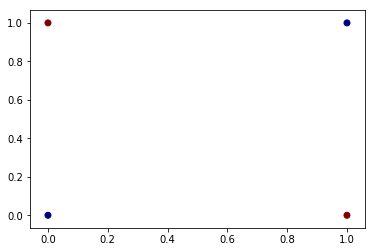

In [2]:
#Puntos en un cuadrado en R2
X = np.array([[0,1],[1,0],[0,0],[1,1]])
#Definición de problema XOR
Y = np.array([1,1,0,0])

#dimensiones de los datos
m,n = X.shape

#Ploteo
plt.scatter(X[:,0], X[:,1], c=Y, cmap='jet')
plt.show()

### Solución del problema XOR por funciones lógicas básicas

El problema XOR puede expresarse por medio composición de funciones lógicas básicas o perceptrones, como:

$$AND(x_1,x_2) = AND[NOT(AND(x_1,x_2)), OR(x_1,x_2)]$$

Así, podemos definir varios perceptrones para solucionar este problema.

In [3]:
#Perceptrón AND
def AND(x):
    w = np.array([1,1])
    return 1*(np.dot(x,w)-1.5 > 0)

#Perceptrón OR
def OR(x):
    w = np.array([1,1])
    return 1*(np.dot(x,w)-0.5 > 0)

#Perceptrón NOT x_1
def NOT(x):
    try:
        w = np.array([-1,0])
        return 1*(np.dot(x,w) + 0.5 > 0)
    except:
        return 1*(-x + 0.5 > 0)

Estas funciones, entonces, clasifican los datos según cada uno de los problemas.

In [4]:
print(X)
print(AND(X))
print(OR(X))
print(NOT(X))

[[0 1]
 [1 0]
 [0 0]
 [1 1]]
[0 0 0 1]
[1 1 0 1]
[1 0 1 0]


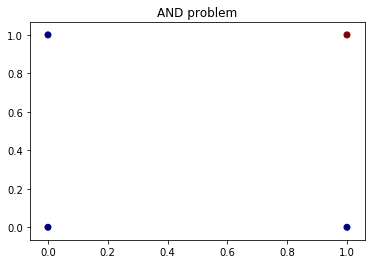

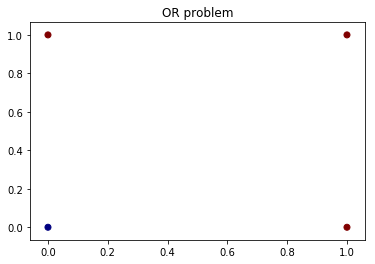

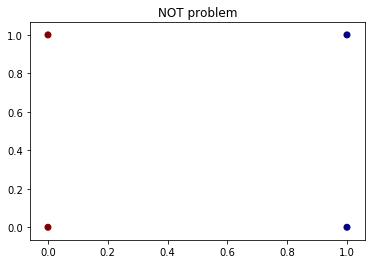

In [5]:
#Ploteo
plt.scatter(X[:,0], X[:,1], c=AND(X), cmap='jet')
plt.title('AND problem')
plt.show()

plt.scatter(X[:,0], X[:,1], c=OR(X), cmap='jet')
plt.title('OR problem')
plt.show()

plt.scatter(X[:,0], X[:,1], c=NOT(X), cmap='jet')
plt.title('NOT problem')
plt.show()

Finalmente, podemos ver que componiendo estas funciones puede resolverse el problema XOR:

[1 1 0 0] [1 1 0 0]


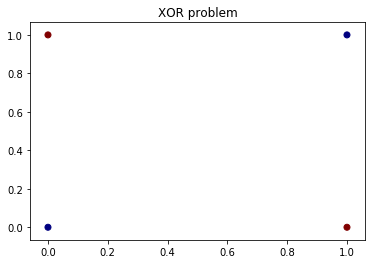

In [6]:
#Función XOR
XOR = lambda x: AND(np.array([NOT(AND(X)),OR(X)]).T)
print(Y,XOR(X))

#ploteo
plt.scatter(X[:,0], X[:,1], c=XOR(X), cmap='jet')
plt.title('XOR problem')
plt.show()

### Entrenamiento de la red

Definiremos una red con una sala capa oculta. Basta con que esta capa oculta tenga tres dimensiones. Esta capa oculta, además tendra una activación por medio de la tangente hiperbólica. Entonces, la podemos definir como:

$$h= \tanh(W^{(1)}\cdot x + b^{(1)})$$

La capa de salida estará dada por la función softmax. En este caso, determinamos la función Sofmax como:

$$f_i(x) = \frac{\exp(o_i-\max(o))}{\sum_k \exp(o_k-\max(o))}$$

En este caso, tenemos dos neuronas de salidas, pues tenemos dos clases (0 y 1). La clase que se eligirá será aquella que maximice la probabilidad.

Para actualizar los pesos, utilizaremos el algoritmo de backpropagation y el gradiente descendiente. Dado que la función Softmax determina probabilidades de clase, utilizaremos la entropía cruzada como función de riesgo:

$$R(\theta) = \sum_x y_x \log f(x)$$

In [11]:
np.random.seed(0)

#HIPERPARÁMETROS
#Número de dimensiones
h_dim = 3
#Rango de aprendizaje
l = 1.0
#Regularización
reg = 0.0
#Número máximo de iteraciones
max_it = 1000

#Inicialización de parámetros de la red
w1 = np.random.rand(n,h_dim)/np.sqrt(n)
b1 = np.ones(h_dim)
w2 = np.random.rand(h_dim,2)/np.sqrt(h_dim)
b2 = np.ones(2)

t=1 #Primera iteración
stop = False #Condición de paro
while  stop == False:
    #FORWARD
    #Pre-activación capa oculta
    a = np.dot(X,w1) + b1
    #Activación capa oculta
    h = np.tanh(a)
    #Pre-activación capa de salida
    out = np.dot(h,w2)+b2
    #Función softmax
    exp = np.exp( out ) #- np.max(out)) #Resta del máximo
    f = exp/exp.sum(1, keepdims=True)
    
    #BACKPROP
    #Variable de capa de salida
    d_out = exp/exp.sum(1, keepdims=True)
    d_out[range(m),Y] -= 1
    #Variable de capa oculta
    d_h = (1-h**2)*np.dot(d_out,w2.T)
    
    #Derivada sobre w2
    dw2 = np.dot(h.T,d_out)
    #Derivada sobre b2
    db2 = d_out.sum(0)
    #Derivada sobre w1    
    dw1 = np.dot(X.T,d_h)
    #Derivada sobre b1
    db1 = d_h.sum(0)
    #Derivada regularización
    dw2 += reg*w2
    dw1 += reg*w1
    
    #Actualización de pesos
    w2 -= l*dw2
    b2 -= l*db2
    w1 -= l*dw1
    b1 -= l*db1
    
    #Cálculo de errores cometidos
    error = ((np.argmax(f, axis=1)-Y)**2).sum(0)
    if t%10 == 0: 
        print('Época', t, '\t Error', error, np.argmax(f, axis=1), '\t Entropy', -np.log(f[range(m),Y]).sum(0))
    
    #Aumenta la iteración
    t += 1
    #Condición de paro
    if error == 0 or t == max_it:
        stop = True
        print('Época', t, '\t Error', error, np.argmax(f, axis=1), '\t Entropy', -np.log(f[range(m),Y]).sum(0))
    

Época 10 	 Error 2 [1 1 1 1] 	 Entropy 19.80433163491336
Época 20 	 Error 2 [1 1 1 1] 	 Entropy 19.464414921186
Época 30 	 Error 2 [1 1 1 1] 	 Entropy 18.986924058043314
Época 40 	 Error 2 [1 1 1 1] 	 Entropy 12.726842813067904
Época 50 	 Error 1 [1 1 0 1] 	 Entropy 11.775223096382256
Época 60 	 Error 1 [1 1 0 1] 	 Entropy 2.1105424607521286
Época 70 	 Error 2 [0 0 0 0] 	 Entropy 7.620922160395223
Época 80 	 Error 1 [1 1 0 1] 	 Entropy 11.688537799457938
Época 90 	 Error 1 [1 1 0 1] 	 Entropy 3.7049033867067176
Época 100 	 Error 2 [0 0 0 0] 	 Entropy 7.444495919085316
Época 110 	 Error 1 [1 1 0 1] 	 Entropy 8.18805862092383
Época 115 	 Error 0 [1 1 0 0] 	 Entropy 0.9005068599941397


#### Visualización

La capa oculta puede verse como una transformación sobre los datos originales. En el caso del problema XOR, los datos en dos dimensiones han pasado a un espacio de tres dimensiones, donde se pueden trazar regiones de decisión de las clases.

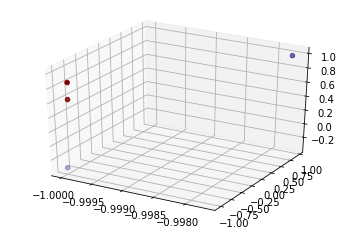

In [12]:
#Aplicación de la capa oculta
X_trans = np.tanh(np.dot(X,w1) + b1)

#Ploteo
ax = plt.axes(projection='3d')
ax.scatter(X_trans[:,0], X_trans[:,1], X_trans[:,2], c=Y, cmap='jet')
plt.show()

Si bien los datos a través de la capa oculta son transformados a 3 dimensiones, estos pueden plotearse en dos dimensiones por medio de técnicas de reducción de dimensionalidad. En este caso utilizamos PCA, técnica que se verá más adelante.

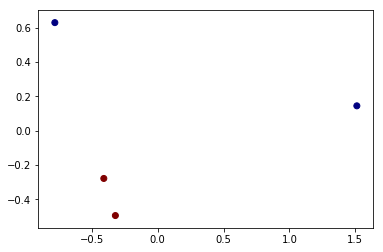

In [14]:
#Función para visualizar en 2-dimensiones
from sklearn.decomposition import PCA

#Ploteo
Xp = PCA(n_components=2).fit_transform(X_trans)
plt.scatter(Xp[:,0], Xp[:,1],c=Y, cmap='jet')
plt.show()

Asimismo, podemos  observar cómo se comporta la clase positiva (1) con respecto a una probabilidad sigmoidal (aunque en este caso no hemos utilizado una función sigmoide, sino Softmax).

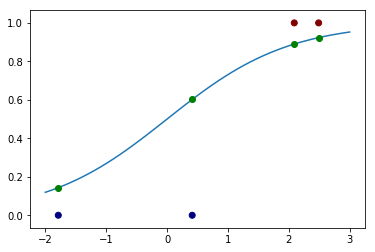

In [15]:
#Salida de la red
a = np.dot(X_trans,w2)+b2
p = np.exp(a)
p = p/p.sum(0, keepdims=True)

#Visualización de probabilidades
k = np.linspace(-2,3)

plt.scatter(a[:,1],Y,c=Y,cmap='jet') 
plt.plot(k, 1./(1.+np.exp(-k)))
plt.plot(a[:,1],1./(1.+np.exp(-a[:,1])),'o',c='g')
plt.show()

Podemos ver que esta transformación realizada en la capa oculta hace que los datos sean linelmente separables (en este caso por un hiperplano). Esto también se puede ver si se aplica una transformación que nos permita ver la capa oculta en dos dimensiones.

Entonces, una red FeedForward nos permite resolver el problema XOR a partir de aplicar una transformación a los datos de entrada. Las redes FeedForward son una herramienta poderosa, que, sin embargo, requiere de una elección adecuada de hiperparámetros, además de mayor capacidad de cómputo que otro tipo de algoritmos.

## Agragar capas ocultas

Si bien una red FeedForward con una sola capa es suficiente, en el apartado anterior hemos utilizado una técnica no supervisada de reducción de dimensionalidad. Ahora, agregaremos una capa más para que los datos en 3 dimensiones sean transformados a un espacio 2-dimensional (lo que facilita la visualización de la decisión de la red). En este sentido, construiremos una red compuesta de dos funciones o transformaciones: 

$$X \to \mathbb{R}^3 \to \mathbb{R}^2 \to Y$$

In [16]:
np.random.seed(0)

#HIPERPARÁMETROS
#Número de dimensiones
h_dim = 3
o_dim = 2
#Rango de aprendizaje
l = 0.05
#Regularización
reg = 0.0
#Número máximo de iteraciones
max_it = 1000

#Inicialización de parámetros de la red
w1 = np.random.rand(n,h_dim)/np.sqrt(n)
b1 = np.ones(h_dim)
w2 = np.random.rand(h_dim,o_dim)/np.sqrt(h_dim)
b2 = np.ones(o_dim)
w = np.random.rand(o_dim,2)/np.sqrt(o_dim)
b = np.ones(2)

t=0 #Primera iteración
stop = False #Condición de paro
while  stop == False:
    #FORWARD
    #Pre-activación capa oculta
    a = np.dot(X,w1) + b1
    #Activación capa oculta 1
    h1 = np.tanh(a)
    #Activacion capa oculta 2
    h2 = np.dot(h1,w2) + b2
    #Pre-activación capa de salida
    out = np.dot(h2,w)+b
    #Función softmax
    exp = np.exp( out ) #- np.max(out)) #Resta del máximo
    f = exp/exp.sum(1, keepdims=True)
    
    #BACKPROP
    #Variable de capa de salida
    d_out = exp/exp.sum(1, keepdims=True)
    d_out[range(m),Y] -= 1
    #Variable de capa oculta 2
    d_h2 = np.dot(d_out,w.T)
    #Variable de capa oculta 1
    d_h1 = (1-h1**2)*np.dot(d_h2,w2.T)
    
    #Derivada sobre w
    dw = np.dot(h2.T,d_out)
    #Derivada sobre b
    db = d_out.sum(0)
    #Derivada sobre w2
    dw2 = np.dot(h1.T,d_h2)
    #Derivada sobre b2
    db2 = d_h2.sum(0)
    #Derivada sobre w1    
    dw1 = np.dot(X.T,d_h1)
    #Derivada sobre b1
    db1 = d_h1.sum(0)
    #Derivada regularización
    dw += reg*w
    dw2 += reg*w2
    dw1 += reg*w1
    
    #Actualización de pesos
    w -= l*dw
    b -= l*db
    w2 -= l*dw2
    b2 -= l*db2
    w1 -= l*dw1
    b1 -= l*db1
    
    #Cálculo de errores cometidos
    error = ((np.argmax(f, axis=1)-Y)**2).sum(0)
    if t%10 == 0: 
        print('Época', t, '\t Error', error, np.argmax(f, axis=1), '\t Entropy', -np.log(f[range(m),Y]).sum(0))
    
    #Aumenta la iteración
    t += 1
    #Condición de paro
    if error == 0 or t == max_it:
        stop = True
        print('Época', t, '\t Error', error, np.argmax(f, axis=1), '\t Entropy', -np.log(f[range(m),Y]).sum(0))
    

Época 0 	 Error 2 [1 1 1 1] 	 Entropy 2.913528013077499
Época 10 	 Error 2 [1 1 1 1] 	 Entropy 2.770594504946628
Época 20 	 Error 2 [1 1 1 1] 	 Entropy 2.7702572968830963
Época 30 	 Error 2 [1 1 1 1] 	 Entropy 2.7699135017125007
Época 40 	 Error 2 [1 1 1 1] 	 Entropy 2.769562163788064
Época 50 	 Error 2 [1 1 1 1] 	 Entropy 2.7692022771713667
Época 60 	 Error 2 [1 1 1 1] 	 Entropy 2.768832777919105
Época 70 	 Error 2 [1 1 1 1] 	 Entropy 2.7684525355515928
Época 80 	 Error 2 [1 1 1 1] 	 Entropy 2.768060343558782
Época 90 	 Error 1 [1 1 0 1] 	 Entropy 2.767654908776018
Época 100 	 Error 1 [1 1 0 1] 	 Entropy 2.76723483943324
Época 110 	 Error 1 [1 1 0 1] 	 Entropy 2.766798631646736
Época 120 	 Error 1 [1 1 0 1] 	 Entropy 2.7663446540805117
Época 130 	 Error 1 [1 1 0 1] 	 Entropy 2.76587113045311
Época 140 	 Error 1 [1 1 0 1] 	 Entropy 2.7653761195031263
Época 150 	 Error 1 [1 1 0 1] 	 Entropy 2.7648574919499422
Época 160 	 Error 1 [1 1 0 1] 	 Entropy 2.7643129038918373
Época 170 	 Error 1

Podemos visualizar la última capa para ver cómo se comportan los datos transformados antes de la capa  de clasificación:

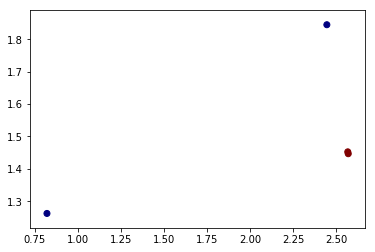

In [17]:
#Primera capa
h1x = np.tanh(np.dot(X,w1) + b1)
#Segunda capa
h2x = np.dot(h1x,w2) + b2

#Ploteo
plt.scatter(h2x[:,0], h2x[:,1],c=Y, cmap='jet')
plt.show()

In [18]:
#Datos en la segunda capa
print(h2x)

[[2.57094972 1.44682045]
 [2.56821493 1.4526232 ]
 [0.8213648  1.26263607]
 [2.44676703 1.84463371]]


Finalmente, podemos observar cómo se reflejan estos datos en una función sigmoidal.

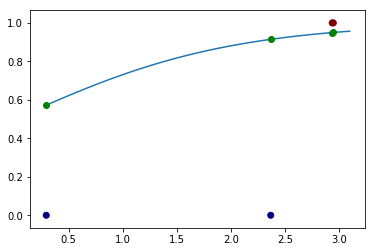

In [19]:
#Ploteo probs.
k = np.linspace(0.3,3.1)
ox = np.dot(h2x,w) + b
plt.scatter(ox[:,1],Y,c=Y, cmap='jet')
plt.plot(k, 1./(1.+np.exp(-k)))
plt.plot(ox[:,1],1./(1.+np.exp(-ox[:,1])),'o',c='g')
plt.show()